In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
ttv_fit_mod = np.loadtxt('./ttv_mod_MAP.out')[:,1]+277
ttv_fit_mod_dense = np.loadtxt('./ttv_mod_dense_MAP.out')[:,1]+277


In [51]:
ttv_fit_mod_moon = np.loadtxt('./luna_t0s.out')
ttv_fit_mod_moon_dense = pd.read_csv('./luna_t0s_dense.out')

In [52]:
print(ttv_fit_mod_moon)
print(ttv_fit_mod)

[ 277.50591812  438.3877853   760.15492243  921.04581739 1081.92949012
 1242.80830175 1403.70176615 1564.57779999 4943.14770517 5264.9198423 ]
[ 277.50548075  438.38769258  760.15443823  921.04539129 1081.92958295
 1242.80895282 1403.70190878 1564.57762013 4943.14076955 5264.91582578]


In [53]:
ttv_input = pd.read_csv('./times_input.txt', sep='\t')

epochs = ttv_input['epoch'].values
times_input = ttv_input['time'].values
times_input_err = ttv_input['time_err'].values

print(times_input)


koi3678_period = 160.88409 # = 160.88409 +/- 7e-05 from exoplanet transit model
koi3678_t0 = 277.50640136 # = median from transit model





[ 277.5056258   438.38774247  760.15460278  921.0457632  1081.92943759
 1242.80899018 1403.70185134 1564.57761252 4943.13851937 5264.91802539]


In [54]:
linear_ephemeris = []
for epoch in epochs:
    linear_ephemeris.append(koi3678_t0+(epoch*koi3678_period))
    
print(linear_ephemeris)

ttvs_input=[]
ttvs_mod=[]
ttvs_mod_moon=[]
for ii in range(0, len(times_input)):
    ttvs_input.append((times_input[ii]-linear_ephemeris[ii])*24*60)
    
    ttvs_mod.append((ttv_fit_mod[ii]-linear_ephemeris[ii])*24*60)
    ttvs_mod_moon.append((ttv_fit_mod_moon[ii]-linear_ephemeris[ii])*24*60)

    
    

    

linear_ephemeris_dense = []
for dense_epoch in range(0, 32):
    linear_ephemeris_dense.append(koi3678_t0+(dense_epoch*koi3678_period))
    

ttvs_mod_dense=[]
for ii in range(0, 32):
    ttvs_mod_dense.append((ttv_fit_mod_dense[ii]-linear_ephemeris_dense[ii])*24*60)
    



    
linear_ephemeris_luna_dense = []
for dense_epoch in ttv_fit_mod_moon_dense['epochs']:
    linear_ephemeris_luna_dense.append(koi3678_t0+(dense_epoch*koi3678_period))


    
    
    
    
ttvs_mod_luna_dense=[]
for ii in range(0, len(ttv_fit_mod_moon_dense['epochs'])):
    ttvs_mod_luna_dense.append((ttv_fit_mod_moon_dense['times'][ii]-linear_ephemeris_luna_dense[ii])*24*60)
    

    
    


[277.50640136, 438.39049135999994, 760.15867136, 921.04276136, 1081.92685136, 1242.8109413599998, 1403.6950313599998, 1564.5791213599998, 4943.14501136, 5264.91319136]


In [55]:
colors = [
    "#581845",
    "#915F6D"]

In [56]:
ttvs_mod

[-1.3256712922157021,
 -4.030244469204263,
 -6.095705650477612,
 3.7870998275138845,
 3.933483346554567,
 -2.863501535830437,
 9.903481117726187,
 -2.1617764557595365,
 -6.108210269012488,
 3.7935693164763507]

In [57]:
ttvs_mod_moon

[-0.6958605141244334,
 -3.896724596797867,
 -5.398452762510715,
 4.400683155035949,
 3.7998190717189573,
 -3.801045010513917,
 9.698090906749712,
 -1.9027731757523725,
 3.8790810853242874,
 9.577352919441182]

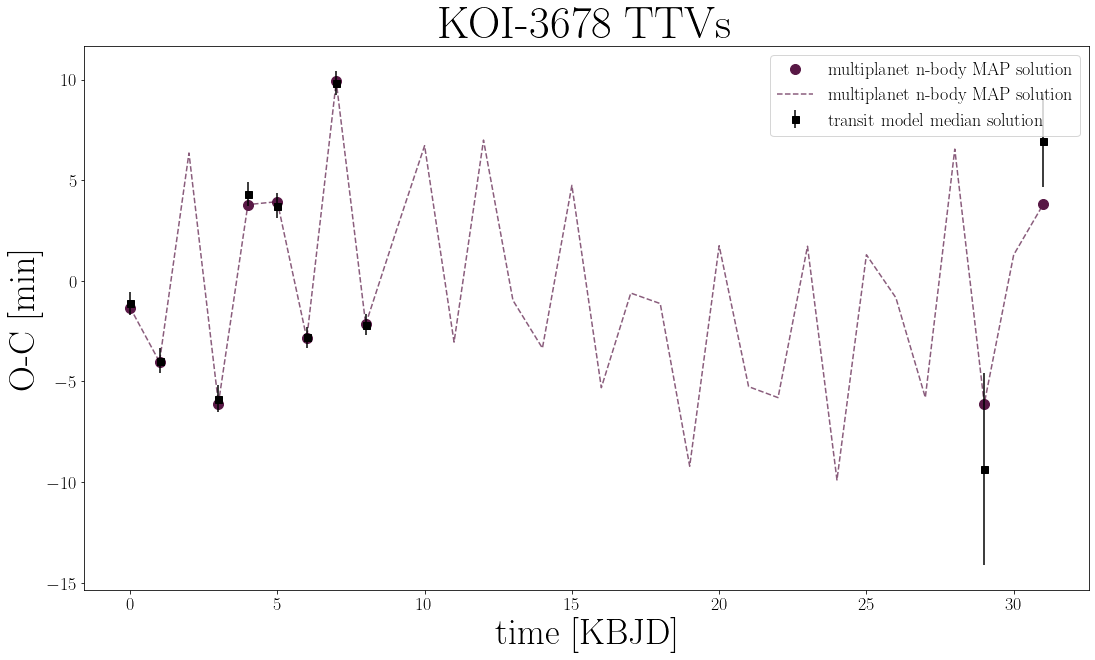

In [58]:
plt.figure(figsize=[18,10])
plt.errorbar(epochs, ttvs_input, yerr=times_input_err*24*60, ls= '', zorder=3, marker='s', color = 'k', ms=7, label='transit model median solution')
plt.plot(epochs, ttvs_mod, 'o', ls='', ms=10, color=colors[0], zorder=2, label = 'multiplanet n-body MAP solution')
plt.plot(range(0, 32), ttvs_mod_dense, ls='--', ms=10, color=colors[0], alpha=0.7, zorder=2, label = 'multiplanet n-body MAP solution')


plt.title('KOI-3678 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

#plt.savefig('swift_fit_forecaster.pdf')

(array([-7.5, -5. , -2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

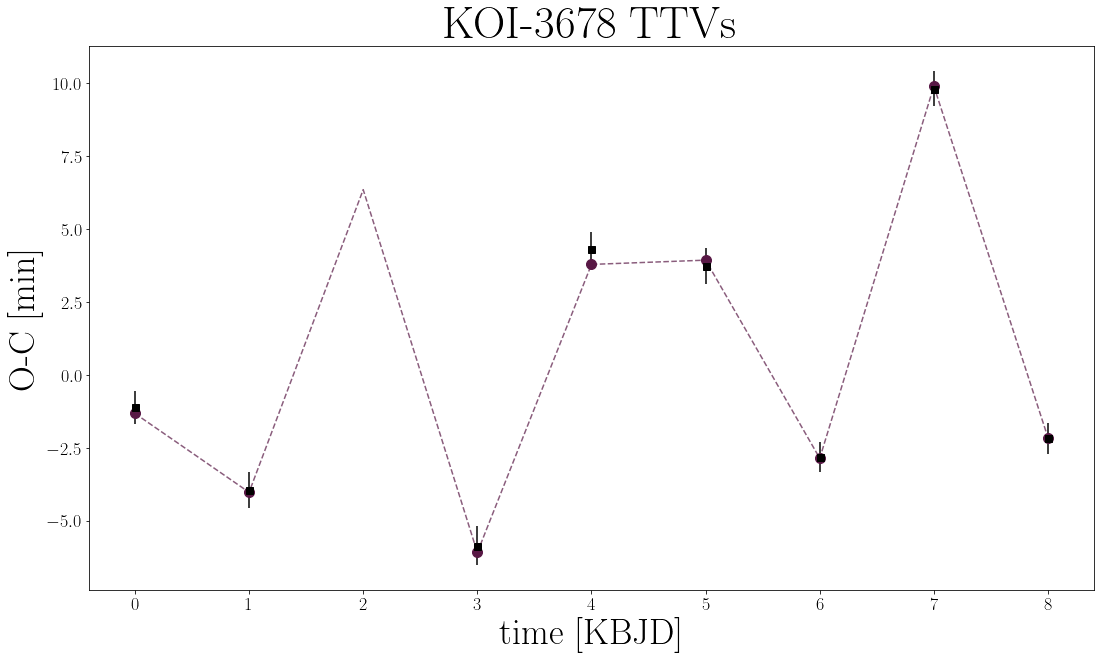

In [59]:
plt.figure(figsize=[18,10])
plt.errorbar(epochs[0:8], ttvs_input[0:8], yerr=times_input_err[0:8]*24*60, ls= '', marker='s', color = 'k', ms=7, label='transit model median solution')
plt.plot(epochs[0:8], ttvs_mod[0:8], 'o', ls='', ms=10, color=colors[0], zorder=2, label = 'multiplanet n-body MAP solution')
plt.plot(range(0, 9), ttvs_mod_dense[0:9], ls='--', ms=10, color=colors[0], alpha=0.7, zorder=2, label = 'multiplanet n-body MAP solution')


plt.title('KOI-3678 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig('swift_fit_forecaster.pdf')

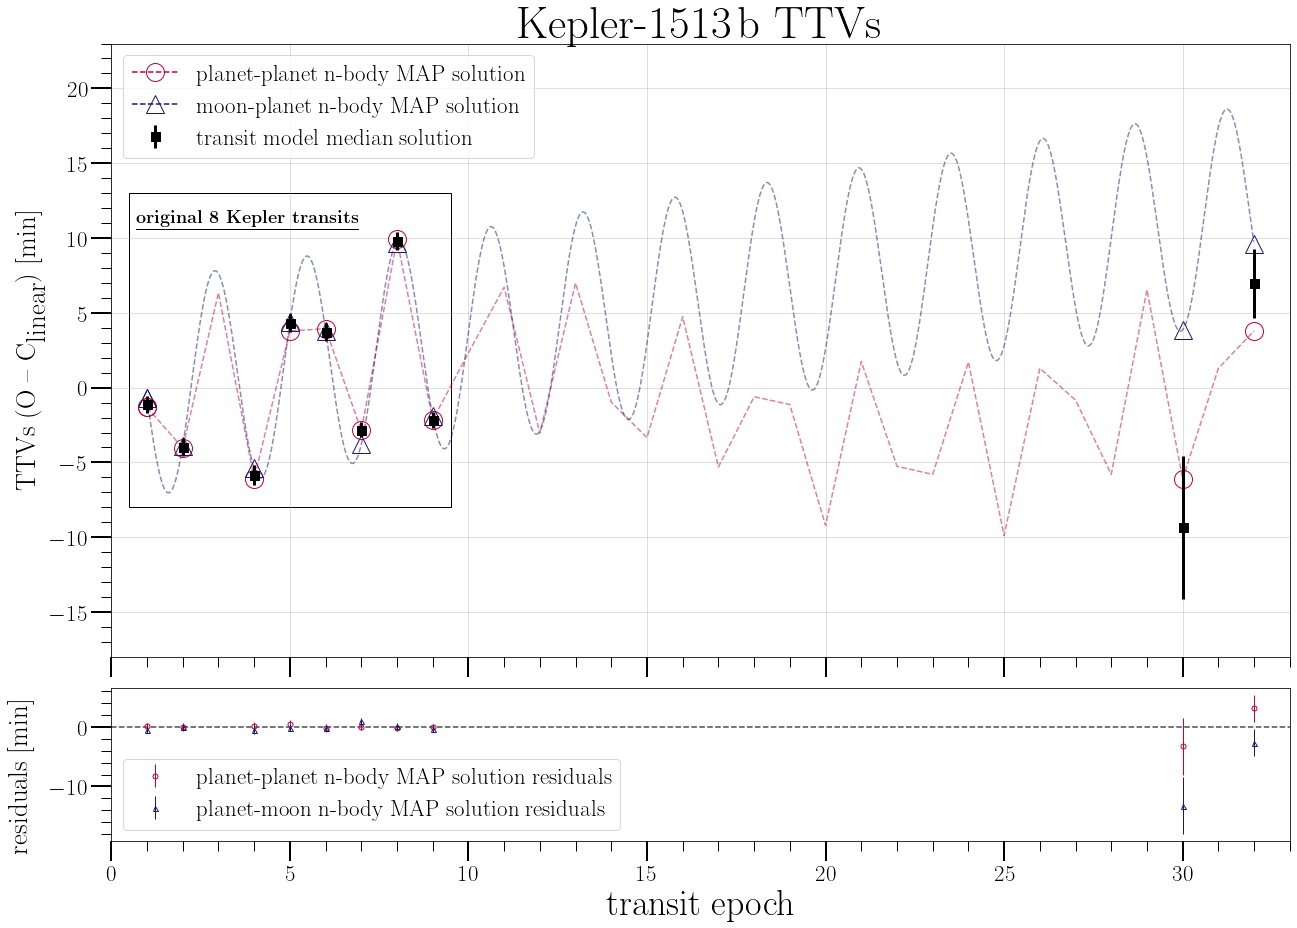

In [60]:
import matplotlib 
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec



matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)


colors = ["#C70039", "#191970"]


fig, ax = plt.subplots(2, figsize=[18, 13], gridspec_kw={'height_ratios': [4, 1]}, sharex=True)

#ax = plt.subplot2grid((2, 2), (0, 0), colspan=2)
#ax1 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
#ax2 = plt.subplot2grid((2, 2), (1, 1), colspan=1)



ax[0].text(0.7, 11, r'\underline{\textbf{original 8 Kepler transits}}', fontsize=18)
ax[0].plot(1, ttvs_mod[0],'o', ls='--', ms=18, markerfacecolor='none', color=colors[0], zorder=2, label = 'planet-planet n-body MAP solution')
ax[0].plot(1, ttvs_mod_moon[0], marker='^', markerfacecolor='none', ls='--', ms=18, color=colors[1], zorder=2, label = 'moon-planet n-body MAP solution')
ax[0].errorbar(epochs+1, ttvs_input, yerr=times_input_err*24*60, ls= '', elinewidth=3,
            zorder=3, marker='s', color = 'k', ms=9, label='transit model median solution')
#ax[0].errorbar(epochs+1, ttvs_input_new, yerr=times_input_err_new, ls= '', elinewidth=3,
#            zorder=3, marker='s', color = 'b', ms=7, label='new transit model median solution')
#ax[0].errorbar(epochs+1, ttvs_input_noGround, yerr=times_input_err_noGround, ls= '', elinewidth=3,
#            zorder=3, marker='s', color = 'g', ms=7, label='no BARO/N model median solution')



ax[0].plot(epochs+1, ttvs_mod, 'o', markerfacecolor='none', ls='', ms=18, color=colors[0], zorder=2)
ax[0].plot(epochs+1, ttvs_mod_moon, '^', markerfacecolor='none', ls='', ms=18, color=colors[1], zorder=2)
ax[0].plot(np.arange(0, 32)+1, ttvs_mod_dense, ls='--', ms=10, color=colors[0], alpha=0.5, zorder=2)
ax[0].plot(ttv_fit_mod_moon_dense['epochs']+1, ttvs_mod_luna_dense, ls='--', ms=10, color=colors[1], alpha=0.5, zorder=2)

# Create a Rectangle patch
rect = patches.Rectangle((0.5, -8), 9, 21, edgecolor='k', facecolor='none')
#ax[0].plot([0.5, 1.3], [-7,-14.1], color='k', marker='')
#ax[0].plot([9.5, 17.45], [-7,-14.1], color='k', marker='')

# Add the patch to the Axes
ax[0].add_patch(rect)
ax[0].grid(visible=True, alpha=0.5)



#zax = zoomed_inset_axes(ax[0], 1.8, loc=3,borderpad=5)
#zax.errorbar(epochs[0:8]+1, ttvs_input[0:8], yerr=times_input_err[0:8]*24*60, ls= '', 
#             elinewidth=3, zorder=3, marker='s', color = 'k', ms=7)
#zax.errorbar(epochs[0:8]+1, ttvs_input_new[0:8], yerr=times_input_err_new[0:8]*24*60, ls= '', 
#             elinewidth=3, zorder=3, marker='s', color = 'b', ms=7)
#zax.errorbar(epochs[0:8]+1, ttvs_input_noGround[0:8], yerr=times_input_err_noGround[0:8]*24*60, ls= '', 
#             elinewidth=3, zorder=3, marker='s', color = 'g', ms=7)

#zax.plot(epochs[0:8]+1, ttvs_mod[0:8], 'o', ls='', ms=13, color=colors[0], zorder=2)
#zax.plot(epochs[0:8]+1, ttvs_mod_moon[0:8], '^', ls='', ms=13, color=colors[1], zorder=2)
#zax.plot(np.arange(0, 10)+1, ttvs_mod_dense[0:10], ls='--', ms=10, color=colors[0], alpha=0.3, zorder=2)
#zax.text(0.7, 11, r'\underline{\textbf{original 8 Kepler transits}}', fontsize=27)
#zax.set_ylim(-7,15)
#zax.yaxis.tick_right()
#zax.xaxis.tick_top()
#zax.grid(visible=True, alpha=0.5)
#zax.set_xticks([0,5,10])
#zax.set_yticks([0,10])
#zax.set_xlim(0.5,9.5)




#plot residuals
ax[1].errorbar(epochs+1, np.array(ttvs_input)-np.array(ttvs_mod), yerr=times_input_err*24*60, ls= '', elinewidth=1,
            zorder=3, marker='o', markerfacecolor='none', color = colors[0], ms=5, label = 'planet-planet n-body MAP solution residuals')
ax[1].errorbar(epochs+1, np.array(ttvs_input)-np.array(ttvs_mod_moon), yerr=times_input_err*24*60, ls= '', elinewidth=1,
            zorder=3, marker='^', markerfacecolor='none', color = colors[1], ms=5, label = 'planet-moon n-body MAP solution residuals')

ax[1].axhline(0,0,1, color='k', ls='--', alpha=0.7)




# We change the length of ticks 
ax[0].tick_params('both', length=20, width=2, which='major')
ax[0].tick_params('both', length=10, width=1, which='minor')
ax[0].minorticks_on()

# We change the length of ticks 
ax[1].tick_params('both', length=20, width=2, which='major')
ax[1].tick_params('both', length=10, width=1, which='minor')
ax[1].minorticks_on()

# We change the length of ticks 
#ax[2].tick_params('both', length=20, width=2, which='major')
#ax[2].tick_params('both', length=10, width=1, which='minor')
#ax[2].minorticks_on()

# We change the length of ticks 
#zax.tick_params('both', length=10, width=2, which='major')
#zax.tick_params('both', length=5, width=1, which='minor')
#zax.minorticks_on()


ax[0].set_title(r'Kepler-1513\,b TTVs', fontsize=45)
ax[0].set_ylabel(r'TTVs (O -- C$_\textrm{linear}$) [min]', fontsize=27)

fig.text(0.002, 0.09, r'residuals [min]', fontsize=27, rotation='vertical')

#ax[2].set_ylabel(r'O -- C$_\textrm{linear}$ -- C$_\textrm{TTV}$ [min]', fontsize=36)
#ax[2].set_ylabel(r'O -- C$_\textrm{linear}$ -- C$_\textrm{TTV}$ [min]', fontsize=36)
ax[1].set_xlabel('transit epoch', fontsize=36)
ax[0].set_xlim(0,33)
ax[0].set_ylim(-18,23)



ax[0].legend(fontsize=23, loc=2)
ax[1].legend(fontsize=23, loc=3)


fig.tight_layout()
fig.savefig('./koi3678_ttvs_final.pdf')
